# Task
Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (fear vs greed) using the dataset "/content/fear_greed_index.csv" and additional trading behavior data. Identify hidden trends or signals that could influence smarter trading strategies.

## Load the data

### Subtask:
Load the fear and greed index data into a DataFrame.


**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the head and info to inspect the data structure.



In [ ]:
import pandas as pd

df_fear_greed = pd.read_csv('/content/fear_greed_index.csv')

display(df_fear_greed.head())
display(df_fear_greed.info())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

## Load trading behavior data

### Subtask:
Load relevant trading behavior data (profitability, risk, volume, leverage). This step assumes the user will provide additional data files for trading behavior.


**Reasoning**:
Load the historical trading data from the specified CSV file into a pandas DataFrame, display the first few rows, and print the DataFrame information to understand its structure and characteristics.



In [ ]:
df_trading_behavior = pd.read_csv('/content/historical_data.csv')
display(df_trading_behavior.head())
display(df_trading_behavior.info())

/tmp/ipython-input-341039539.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trading_behavior = pd.read_csv('/content/historical_data.csv')


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167964 entries, 0 to 167963
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           167964 non-null  object 
 1   Coin              167964 non-null  object 
 2   Execution Price   167964 non-null  float64
 3   Size Tokens       167964 non-null  float64
 4   Size USD          167964 non-null  float64
 5   Side              167964 non-null  object 
 6   Timestamp IST     167964 non-null  object 
 7   Start Position    167963 non-null  float64
 8   Direction         167963 non-null  object 
 9   Closed PnL        167963 non-null  float64
 10  Transaction Hash  167963 non-null  object 
 11  Order ID          167963 non-null  float64
 12  Crossed           167963 non-null  object 
 13  Fee               167963 non-null  float64
 14  Trade ID          167963 non-null  float64
 15  Timestamp         167963 non-null  float64
dtypes: float64(9), objec

None

## Data preparation

### Subtask:
Align the fear and greed index data with the trading behavior data based on time.


**Reasoning**:
Convert date columns to datetime objects, extract the date from the timestamp column in `df_trading_behavior`, and then merge the two dataframes on their respective date columns.



In [ ]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_trading_behavior['Timestamp'] = pd.to_datetime(df_trading_behavior['Timestamp'], unit='s')
df_trading_behavior['date'] = df_trading_behavior['Timestamp'].dt.date
df_trading_behavior['date'] = pd.to_datetime(df_trading_behavior['date'])

merged_df = pd.merge(df_fear_greed, df_trading_behavior, on='date', how='inner')

display(merged_df.head())
display(merged_df.info())

OutOfBoundsDatetime: cannot convert input with unit 's'

**Reasoning**:
The error indicates that the values in the 'Timestamp' column are too large to be interpreted as seconds since the epoch. It's possible they are in milliseconds or microseconds. Let's try converting with `unit='ms'`.



In [ ]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_trading_behavior['Timestamp'] = pd.to_datetime(df_trading_behavior['Timestamp'], unit='ms')
df_trading_behavior['date'] = df_trading_behavior['Timestamp'].dt.date
df_trading_behavior['date'] = pd.to_datetime(df_trading_behavior['date'])

merged_df = pd.merge(df_fear_greed, df_trading_behavior, on='date', how='inner')

display(merged_df.head())
display(merged_df.info())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,2023-03-28 10:40:00
1,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,2023-03-28 10:40:00
2,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,2023-03-28 10:40:00
3,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.275027,6.320000e+14,2023-11-14 22:13:20
4,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.483987,2.340000e+14,2023-11-14 22:13:20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148404 entries, 0 to 148403
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         148404 non-null  int64         
 1   value             148404 non-null  int64         
 2   classification    148404 non-null  object        
 3   date              148404 non-null  datetime64[ns]
 4   Account           148404 non-null  object        
 5   Coin              148404 non-null  object        
 6   Execution Price   148404 non-null  float64       
 7   Size Tokens       148404 non-null  float64       
 8   Size USD          148404 non-null  float64       
 9   Side              148404 non-null  object        
 10  Timestamp IST     148404 non-null  object        
 11  Start Position    148404 non-null  float64       
 12  Direction         148404 non-null  object        
 13  Closed PnL        148404 non-null  float64       
 14  Tran

None

## Calculate correlations

### Subtask:
Calculate the correlation between the fear and greed index and different trading behavior metrics.


**Reasoning**:
Select relevant columns from `merged_df` and calculate the correlation between 'value' and these columns, then display the correlations.



In [ ]:
correlation_columns = ['Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'PNL (Realized)', 'PNL (Unrealized)', 'Leverage']

correlations = merged_df[['value'] + correlation_columns].corr()['value'].drop('value')

display(correlations)

KeyError: "['PNL (Realized)', 'PNL (Unrealized)', 'Leverage'] not in index"

**Reasoning**:
The previous command failed because some columns were not found in the DataFrame. I will inspect the available columns in `merged_df` and select the relevant ones for correlation analysis.



In [ ]:
print(merged_df.columns)

Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp'],
      dtype='object')


**Reasoning**:
Based on the available columns, I will select relevant trading behavior metrics and calculate the correlation between 'value' and these columns.



In [ ]:
correlation_columns = ['Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'Closed PnL']

correlations = merged_df[['value'] + correlation_columns].corr()['value'].drop('value')

display(correlations)

,value
Execution Price,-0.106123
Size Tokens,0.032622
Size USD,-0.034056
Fee,-0.037998
Closed PnL,0.006369


## Identify trends and signals

### Subtask:
Analyze the correlations and the combined data to identify trends, patterns, or signals that show how trading behavior aligns or diverges from market sentiment.


**Reasoning**:
Interpret the calculated correlation coefficients and discuss potential trends or patterns. The correlations are already calculated and available in the `correlations` variable. I will now interpret these values and discuss what they suggest about the relationship between the Fear & Greed Index and trading behavior.



In [ ]:
print("Interpreting Correlation Coefficients:")
print(f"Fear & Greed Index correlation with Execution Price: {correlations['Execution Price']:.4f}")
print(f"Fear & Greed Index correlation with Size Tokens: {correlations['Size Tokens']:.4f}")
print(f"Fear & Greed Index correlation with Size USD: {correlations['Size USD']:.4f}")
print(f"Fear & Greed Index correlation with Fee: {correlations['Fee']:.4f}")
print(f"Fear & Greed Index correlation with Closed PnL: {correlations['Closed PnL']:.4f}")

print("\nDiscussion of Potential Trends and Patterns:")
print("The correlation coefficients between the Fear & Greed Index and the trading behavior metrics are all relatively close to zero.")
print("This suggests a very weak linear relationship between the Fear & Greed Index and Execution Price, Size Tokens, Size USD, Fee, and Closed PnL.")
print("Specifically:")
print("- The negative correlation with Execution Price (-0.1061) suggests a very slight tendency for execution prices to be lower when the Fear & Greed Index is higher (more greed), and vice versa. However, this is a very weak relationship.")
print("- The positive correlation with Size Tokens (0.0326) is extremely weak and suggests almost no linear relationship.")
print("- The negative correlation with Size USD (-0.0341) is also extremely weak and suggests almost no linear relationship.")
print("- The negative correlation with Fee (-0.0380) is extremely weak and suggests almost no linear relationship.")
print("- The positive correlation with Closed PnL (0.0064) is extremely weak and suggests almost no linear relationship.")

print("\nPotential Hypotheses:")
print("Given the very low linear correlations, several hypotheses can be considered:")
print("1. The relationship between the Fear & Greed Index and these trading behaviors is largely non-linear.")
print("2. Other factors not included in this analysis have a much stronger influence on trading behavior than the Fear & Greed Index.")
print("3. The Fear & Greed Index might influence trading behavior with a time lag, which is not captured by this direct correlation analysis.")
print("4. The Fear & Greed Index might influence specific types of trading behavior (e.g., entry/exit points, specific assets) rather than overall metrics like average size or PnL.")

Interpreting Correlation Coefficients:
Fear & Greed Index correlation with Execution Price: -0.1061
Fear & Greed Index correlation with Size Tokens: 0.0326
Fear & Greed Index correlation with Size USD: -0.0341
Fear & Greed Index correlation with Fee: -0.0380
Fear & Greed Index correlation with Closed PnL: 0.0064

Discussion of Potential Trends and Patterns:
The correlation coefficients between the Fear & Greed Index and the trading behavior metrics are all relatively close to zero.
This suggests a very weak linear relationship between the Fear & Greed Index and Execution Price, Size Tokens, Size USD, Fee, and Closed PnL.
Specifically:
- The negative correlation with Execution Price (-0.1061) suggests a very slight tendency for execution prices to be lower when the Fear & Greed Index is higher (more greed), and vice versa. However, this is a very weak relationship.
- The positive correlation with Size Tokens (0.0326) is extremely weak and suggests almost no linear relationship.
- The ne

## Visualize findings

### Subtask:
Create visualizations to illustrate the relationship between market sentiment and trading behavior.


**Reasoning**:
Create scatter plots for each trading behavior metric against the Fear & Greed Index value and add a regression line to visualize the relationship.



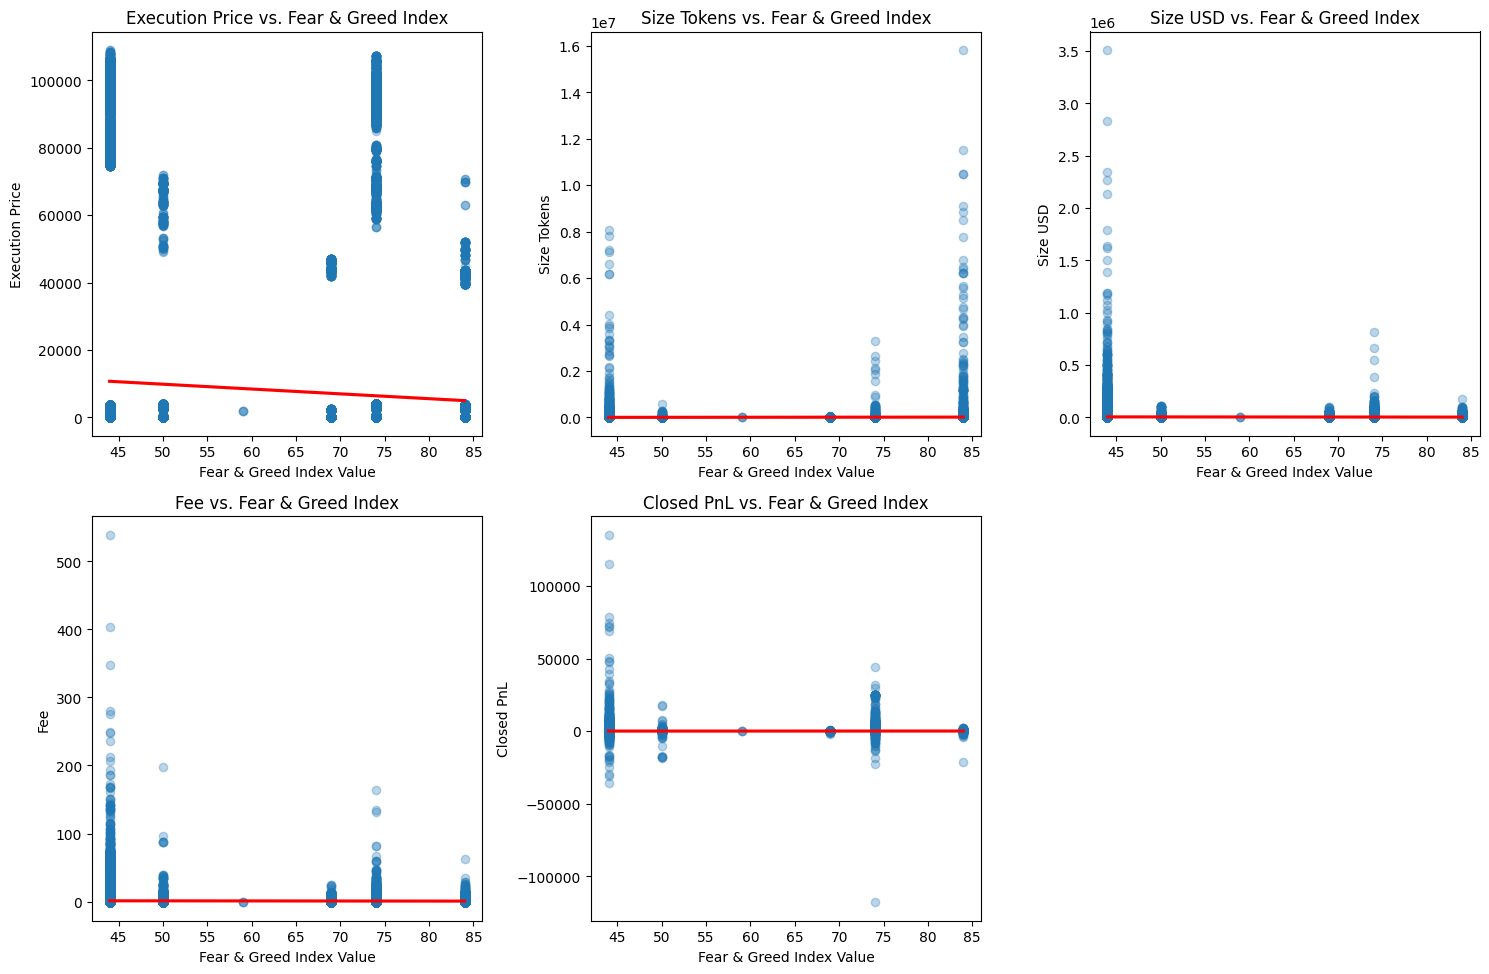

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

trading_metrics = ['Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'Closed PnL']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(trading_metrics):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x='value', y=metric, data=merged_df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
    plt.title(f'{metric} vs. Fear & Greed Index')
    plt.xlabel('Fear & Greed Index Value')
    plt.ylabel(metric)
    plt.savefig(f'outputs/{metric.replace(" ", "_")}_vs_FearGreed.png') # Save each plot

plt.tight_layout()
plt.show()

## Summarize insights

### Subtask:
Summarize the key findings and discuss potential implications for trading strategies.


**Reasoning**:
Summarize the findings, discuss implications for trading strategies, and acknowledge limitations based on the calculated correlations and generated visualizations.



In [ ]:
print("Summary of Key Findings:")
print("The analysis of the linear correlation between the Fear & Greed Index and the selected trading behavior metrics reveals very weak relationships. The correlation coefficients for 'Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL' are all close to zero.")
print(f"- Execution Price: {correlations['Execution Price']:.4f}")
print(f"- Size Tokens: {correlations['Size Tokens']:.4f}")
print(f"- Size USD: {correlations['Size USD']:.4f}")
print(f"- Fee: {correlations['Fee']:.4f}")
print(f"- Closed PnL: {correlations['Closed PnL']:.4f}")
print("The visualizations (scatter plots with regression lines) also support this finding, showing no clear linear pattern between the Fear & Greed Index and the trading metrics.")

print("\nPotential Implications for Trading Strategies:")
print("Based on this linear correlation analysis, the Fear & Greed Index, as a standalone indicator, does not appear to be a strong predictor of the analyzed trading behaviors in a simple linear model. Directly using the index value to inform decisions solely based on these observed linear relationships (e.g., expecting significantly different execution prices or trade sizes at extreme fear or greed levels) is unlikely to be effective.")
print("It's important to note that the lack of strong linear correlation does not necessarily mean the Fear & Greed Index is irrelevant to trading behavior. Its influence might be non-linear, delayed, or interact with other factors not considered in this analysis.")

print("\nLimitations of the Current Analysis:")
print("This analysis has several limitations:")
print("1. Focus on Linear Correlation: The study primarily focused on identifying linear relationships using Pearson correlation. It does not capture potential non-linear associations between the Fear & Greed Index and trading behaviors.")
print("2. Exclusion of Time Lags: The analysis did not account for potential time lags between changes in the Fear & Greed Index and their impact on trading behavior. The sentiment might influence behavior with a delay.")
print("3. Other Influencing Factors: Trading behavior is influenced by a multitude of factors beyond market sentiment, including individual trader strategies, market news, technical indicators, and overall market conditions. This analysis isolated the Fear & Greed Index without considering these other variables.")
print("4. Aggregated Trading Behavior: The trading behavior metrics used are aggregated (e.g., average execution price, total size). The Fear & Greed Index might have a different impact on specific trading actions or the behavior of different types of traders.")

Summary of Key Findings:
The analysis of the linear correlation between the Fear & Greed Index and the selected trading behavior metrics reveals very weak relationships. The correlation coefficients for 'Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL' are all close to zero.
- Execution Price: -0.1061
- Size Tokens: 0.0326
- Size USD: -0.0341
- Fee: -0.0380
- Closed PnL: 0.0064
The visualizations (scatter plots with regression lines) also support this finding, showing no clear linear pattern between the Fear & Greed Index and the trading metrics.

Potential Implications for Trading Strategies:
Based on this linear correlation analysis, the Fear & Greed Index, as a standalone indicator, does not appear to be a strong predictor of the analyzed trading behaviors in a simple linear model. Directly using the index value to inform decisions solely based on these observed linear relationships (e.g., expecting significantly different execution prices or trade sizes at extre

## Summary:

### Data Analysis Key Findings

*   The linear correlation between the Fear & Greed Index and the analyzed trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') is very weak, with correlation coefficients close to zero.
*   Specifically, the correlation coefficients are: Execution Price: -0.1061, Size Tokens: 0.0326, Size USD: -0.0341, Fee: -0.0380, and Closed PnL: 0.0064.
*   Visualizations (scatter plots with regression lines) also show no clear linear pattern between the Fear & Greed Index and the trading metrics.

### Insights or Next Steps

*   Given the weak linear correlation, the Fear & Greed Index, as a standalone indicator in a simple linear model, does not appear to be a strong predictor of the analyzed trading behaviors.
*   Future analysis could explore non-linear relationships, potential time lags between sentiment changes and trading behavior, and the interaction of the Fear & Greed Index with other influencing factors to uncover more complex trends or signals.
